In [1]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import mplstereonet
import math

In [16]:
fault_surfaces_points = pd.read_csv("data/fault_surfaces_points.csv")

In [18]:
from lib.fault import *
fault_surfaces_points_grouped = fault_surfaces_points.groupby('Fault')

faults = [Fault(idx,f[['X','Y','Z']].to_numpy(), 1) for idx, f in fault_surfaces_points_grouped]


In [19]:
faults = process_faults(faults)
df_faults = generate_table(faults)

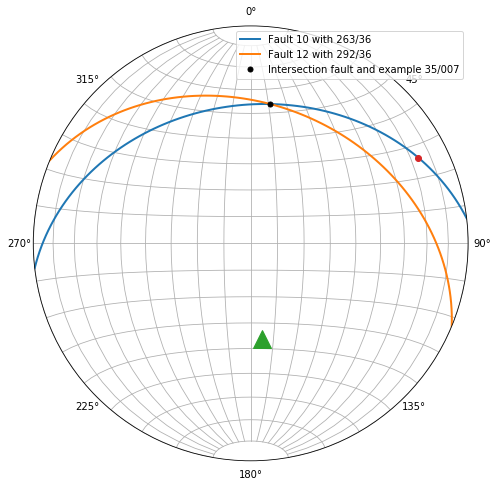

In [84]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='stereonet')

fault_idx_1 = 10
strike, dip = math.degrees(df_faults.loc[fault_idx_1, 'strike']), math.degrees(df_faults.loc[fault_idx_1, 'dip'])
ax.plane(strike, dip, '-', linewidth=2,label='Fault %d with %03d/%02d' % (fault_idx_1, strike, dip)) #########change legend to fault num

fault_idx_2 = 12
strike2, dip2 = math.degrees(df_faults.loc[fault_idx_2, 'strike']), math.degrees(df_faults.loc[fault_idx_2, 'dip'])
ax.plane(strike2, dip2, '-', linewidth=2,label='Fault %d with %03d/%02d' % (fault_idx_2, strike2, dip2)) #########change legend to fault num


ax.pole(strike, dip, '^', markersize=18)
ax.rake(strike, dip, -25)
plunge, bearing = mplstereonet.plane_intersection(strike, dip, strike2, dip2)
ax.line(plunge, bearing, 'ko', markersize=5, label='Intersection fault and example %02d/%03d' % (plunge, bearing))


ax.grid()
ax.legend()
plt.show()


In [10]:
import matplotlib.pyplot as plt
import mplstereonet
import mplstereonet.stereonet_math
from mplstereonet.stereonet_math import sph2cart, stereonet2xyz

fault_idx_1 = 10
strike, dip = math.degrees(df_faults.loc[fault_idx_1, 'strike']), math.degrees(df_faults.loc[fault_idx_1, 'dip'])

fault_idx_2 = 11
strike2, dip2 = math.degrees(df_faults.loc[fault_idx_2, 'strike']), math.degrees(df_faults.loc[fault_idx_2, 'dip'])

plunge, bearing = mplstereonet.plane_intersection(strike, dip, strike2, dip2)
real_rake_angle = mplstereonet.project_onto_plane(strike, dip, plunge, bearing)
rake = mplstereonet.rake(strike, dip, real_rake_angle) # return lon, lat
lon, lat = rake
p_cartesian = sph2cart(lon, lat) # return x, y, z
p_world = stereonet2xyz(lon, lat)


print(strike, dip)
print(plunge)
print(bearing)
print(real_rake_angle)
print(rake)
print(p_cartesian, p_world)

263.43887969224835 36.43576588911453
[36.27909029]
[347.31237413]
[85.06445697]
(array([-0.29074686]), array([0.90505617]))
(array([0.59171902]), array([-0.17705791]), array([0.78645985])) (array([-0.17705791]), array([0.78645985]), array([-0.59171902]))


In [12]:
import numpy as np
import matplotlib.pyplot as plt

print(real_rake_angle)
print(rake)

print(strike, dip)
print(plunge)
print(bearing)

#print(rake_angle)
#print(rake) # return lon, lat

#print(pole) #return strike, dip of the plane whose pole would be parallel to the line specified. 
#print(pole2) #return lon, lat


lon, lat = rake
#print(lon, lat)

import mplstereonet.stereonet_math
from mplstereonet.stereonet_math import sph2cart, stereonet2xyz
p_cart = sph2cart(lon, lat) # return x, y, z
p_world = stereonet2xyz(lon, lat)
print(p_cart, p_world)
#print(p_inter[0])




[85.06445697]
(array([-0.29074686]), array([0.90505617]))
263.43887969224835 36.43576588911453
[36.27909029]
[347.31237413]
(array([0.59171902]), array([-0.17705791]), array([0.78645985])) (array([-0.17705791]), array([0.78645985]), array([-0.59171902]))


In [13]:
import lib.fitting as fit

In [15]:
fitter = fit.FaultFitter()

In [75]:
# Area intersection is a path integral (not the one from particle physics tho

# idea number 1: Normal vector and calcualte the vector. Then add the vertex of hull.convex
#idea number 2: rotate second plane with strike/dip of first plane. And the intersectio line is where second plane goes throught z=0. Use vertex of second plane again.
#idea 3: take intersection point and for each intersection point find a vector between the planes and then path integral with vertex.

#The vector equation for the line of intersection is given by r=r_0+tvr

fault_idx_1 = 10
fault_idx_2 = 11

C = faults[fault_idx_1].C
C2 = faults[fault_idx_2].C

v_norm_planefit = [C[0], C[1], -1]
v_norm_plane2 = [C2[0], C2[1], -1]
v_cross = np.cross(v_norm_planefit, v_norm_plane2)
print(v_cross)


# better idea with rake: Take point and rake
# c_intersection
# Point = plunge and bearing in 3D coordinates

data = faults[fault_idx_1].data
data_int = faults[fault_idx_2].data

# for 2-d problem: use shapely module
# from pyny3d.geoms import Point, LineString
from pyny3d.geoms import Polygon

polygon = Polygon(data)
#print(polygon)
point = np.zeros(data.shape)
POINT = []
line = LineString([])
# print(point)
limit = data_int.shape
print(limit)
for i in range(len(data_int)):                #limit
    point = data_int[i:i+1]
#     print(polygon.contains(point))
    if polygon.contains(point):
        print(i)
#         POINT = POINT + point
        POINT.append(point[0])
        #break
print(point)
print(data_int[-1,:])
#tuple(i for i in POINT)
#print(POINT)
POINT = np.stack(POINT)
print(POINT)
# line = LineString(POINT)
# #print(line)

# line.bounds
# print(line.bounds)
# print(line.length)
# print(line.area)


# symmetric equstion = 
#v[t] = np.array([t*v_cross[0]+point[0],t*v_cross[1]+point[1],t*v_cross[2]+point[2]])


# fig = go.Figure(data=[
#     go.Scatter3d(
#         x= POINT[:,0], 
#         y= POINT[:,1],
#         z=-POINT[:,2],
#         mode='markers',
#         marker={
#             'size': 1.5,
# #             'color': labels_faults[::160]
#         }
#     ),
# ],
#     layout = go.Layout(
#         height=800,
#         scene = dict(
#             aspectmode='data',
#     )
# ))
# fig.show()

[ 1.19841773e-01 -7.64902339e+01 -5.36694999e+02]
(141, 3)
31
42
45
46
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
85
86
87
88
90
[[ 1502.97991561 -1120.71875502 -3547.19000128]]
[ 1502.97991561 -1120.71875502 -3547.19000128]
[[ 1350.75924915 -1976.45789908 -2919.43955538]
 [ 1355.71542778 -2131.24026653 -2786.62952117]
 [ 1193.76610508 -2415.37413855 -2551.58535415]
 [ 1125.19126282 -2309.25440935 -2648.08603928]
 [ 1456.46419216 -2483.68625946 -2489.31549295]
 [ 1405.79832519 -2505.51206083 -2472.15196141]
 [ 1396.27211497 -2509.58957515 -2468.94695694]
 [ 1389.77134814 -2512.07896499 -2467.0038884 ]
 [ 1349.87448504 -2516.06540407 -2464.49036226]
 [ 1315.37055913 -2520.20553261 -2462.54657192]
 [ 1241.02413063 -2529.12331636 -2458.35824389]
 [ 1212.49611148 -2532.54622739 -2456.75129059]
 [ 1199.49082882 -2534.33547635 -2456.09493955]
 [ 1185.263372   -2536.29359397 -2455.37699545]
 [ 1157.18335841 -2440.07260473 -2534.01184381]
 [ 1154.948954

In [ ]:
# Area intersection is a path integral (not the one from particle physics tho

# idea number 1: Normal vector and calcualte the vector. Then add the vertex of hull.convex
#idea number 2: rotate second plane with strike/dip of first plane. And the intersectio line is where second plane goes throught z=0. Use vertex of second plane again.
#idea 3: take intersection point and for each intersection point find a vector between the planes and then path integral with vertex.

#The vector equation for the line of intersection is given by r=r_0+tvr

fault_idx_1 = 10
fault_idx_2 = 11

C = faults[fault_idx_1].C
C2 = faults[fault_idx_2].C

v_norm_planefit = [C[0], C[1], -1]
v_norm_plane2 = [C2[0], C2[1], -1]
v_cross = np.cross(v_norm_planefit, v_norm_plane2)
print(v_cross)


# better idea with rake: Take point and rake
# c_intersection
# Point = plunge and bearing in 3D coordinates


# from pyny3d.geoms import Point, LineString
from pyny3d.geoms import Polygon

polygon = Polygon(faults[fault_idx_1].data)
#print(polygon)
point = np.zeros(faults[fault_idx_1].data.shape)
POINT = []
line = LineString([])
# print(point)
limit = faults[fault_idx_2].data.shape
# print(limit)
for i in range(len(faults[fault_idx_2].data)):                #limit
    point = Point(faults[fault_idx_2].data[i:i+1]
    print(point)
    print(polygon.contains(point))
    if polygon.contains(point):
        print(i)
        POINT = POINT + point.coords[:]
#         POINT.append(point.coords[:])
        #break
print(point)
# print[faults[fault_idx_2].data[len(faults[fault_idx_2].data)-1,:]]
print(POINT)
#tuple(i for i in POINT)
#print(POINT)

line = LineString(POINT)
#print(line)

line.bounds
print(line.bounds)
print(line.length)
print(line.area)


# symmetric equstion = 
#v[t] = np.array([t*v_cross[0]+point[0],t*v_cross[1]+point[1],t*v_cross[2]+point[2]])


In [71]:
v_point = np.array(point)

print(v_point[0,0])

-6092.665876134835


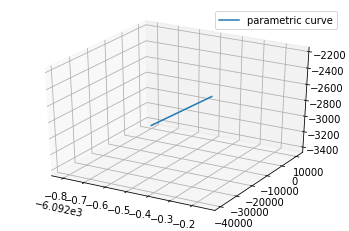

In [73]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import numpy as np
import matplotlib.pyplot as plt


plt.rcParams['legend.fontsize'] = 10
fig = plt.figure()
ax = fig.gca(projection='3d')

# Prepare arrays x, y, z
#theta = np.linspace(-4 * np.pi, 4 * np.pi, 100)
z = np.linspace(np.min(data[:,2]), np.max(data[:,2]), 1000) #replace bounds of line.bounds
#z = np.linspace(-1000, 1000, 100)
t = (z-v_point[0,2])/v_cross[2]
x = (t*v_cross[0])+v_point[0,0]
y = t*v_cross[1]+v_point[0,1]

ax.plot(x, y, z, label='parametric curve')
ax.legend()

plt.show()